<a href="https://colab.research.google.com/github/MelsonHeo00/Pizza_Database/blob/main/Pizza_Restaurant_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scenario: Opening a pizza restaurant can be a profitable venture for entrepreneurs who are willing to put in the effort and dedication required to make it successful. The pizza industry is a multi-billion dollar industry that has remained resilient in the face of economic downturns, making it an attractive investment opportunity for
those seeking to enter the food industry. However, success in the pizza business requires more than just a passion for food; it requires a sound business plan,
effective marketing strategies, and a commitment to delivering high-quality products and exceptional customer service. In this context, this essay will discuss the key
factors that contribute to the profitability of a pizza restaurant and provide insights into how entrepreneurs can increase their chances of success in this competitive
industry.

# Section 1: Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Section 2: Data Wrangling

We will be getting data first by creating four data frames

In [ ]:
pizza_ordersdf = pd.read_csv('https://raw.githubusercontent.com/MelsonHeo00/Pizza_Database/main/Pizza_orders.csv')
pizza_orders_detailsdf = pd.read_csv('https://raw.githubusercontent.com/MelsonHeo00/Pizza_Database/main/Pizza_orders_details.csv')
pizza_pricesdf = pd.read_csv('https://raw.githubusercontent.com/MelsonHeo00/Pizza_Database/main/Pizza_prices.csv')
pizza_typesdf = pd.read_csv('https://raw.githubusercontent.com/MelsonHeo00/Pizza_Database/main/Pizza_types.csv')

We need to check each data and clean up the data if necessary (such as null values)

In [ ]:
pizza_ordersdf.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [ ]:
pizza_orders_detailsdf.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [ ]:
pizza_pricesdf.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_l,bbq_ckn,L,20.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_s,bbq_ckn,S,12.75
3,big_meat_l,big_meat,L,20.50
4,big_meat_m,big_meat,M,16.00


In [ ]:
pizza_typesdf.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
2,brie_carre,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
3,calabrese,The Calabrese Pizza,Supreme,"�Nduja Salami, Pancetta, Tomatoes, Red Onions,..."
4,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."


<Axes: >

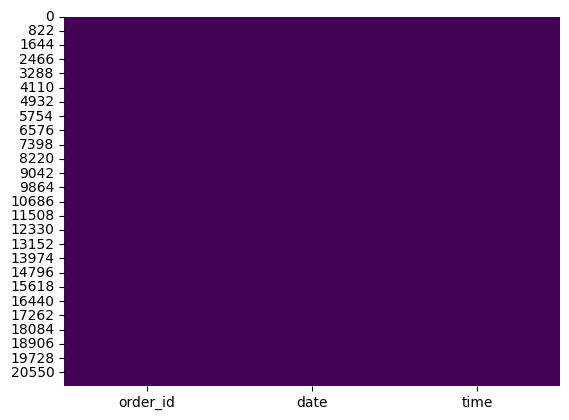

In [ ]:
sns.heatmap(pizza_ordersdf.isnull(), cbar = False, cmap = 'viridis')

<Axes: >

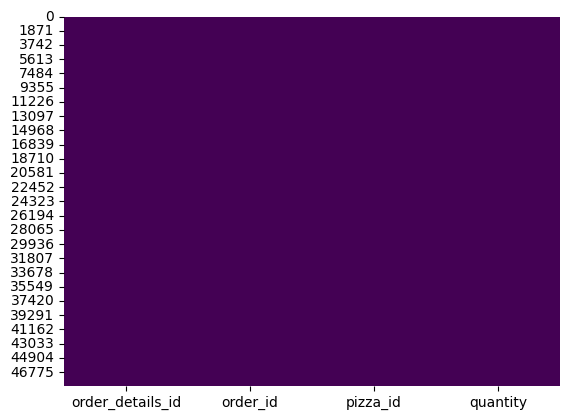

In [ ]:
sns.heatmap(pizza_orders_detailsdf.isnull(), cbar = False, cmap = 'viridis')

<Axes: >

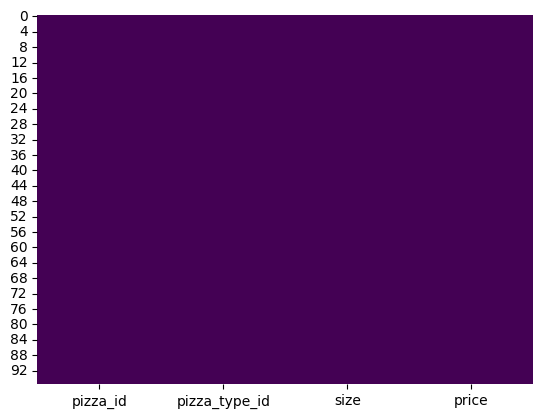

In [ ]:
sns.heatmap(pizza_pricesdf.isnull(), cbar = False, cmap = 'viridis')

<Axes: >

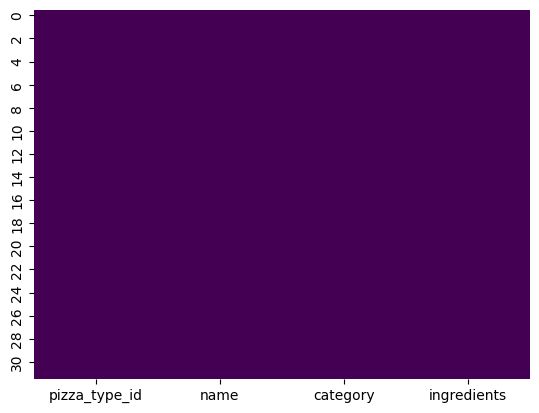

In [ ]:
sns.heatmap(pizza_typesdf.isnull(), cbar = False, cmap = 'viridis')

We can see that the four data has no null values so there is no cleaning up. Now, we need to visualize the data based on the data.
Since we use profitability, we need to prove how profitability is sustainable.

In [ ]:
print(pizza_orders_detailsdf.dtypes)

order_details_id     int64
order_id             int64
pizza_id            object
quantity             int64
dtype: object


In [ ]:
print(pizza_ordersdf.dtypes)

order_id     int64
date        object
time        object
dtype: object


In [ ]:
print(pizza_pricesdf.dtypes)

pizza_id          object
pizza_type_id     object
size              object
price            float64
dtype: object


In [ ]:
print(pizza_typesdf.dtypes)

pizza_type_id    object
name             object
category         object
ingredients      object
dtype: object


In [ ]:
for col in pizza_orders_detailsdf.columns:
    print(f"Unique values in {col}: {pizza_orders_detailsdf[col].unique()}")

Unique values in order_details_id: [    1     2     3 ... 48618 48619 48620]
Unique values in order_id: [    1     2     3 ... 21348 21349 21350]
Unique values in pizza_id: ['hawaiian_m' 'classic_dlx_m' 'five_cheese_l' 'ital_supr_l' 'mexicana_m'
 'thai_ckn_l' 'ital_supr_m' 'prsc_argla_l' 'bbq_ckn_s' 'the_greek_s'
 'spinach_supr_s' 'classic_dlx_s' 'green_garden_s' 'ital_cpcllo_l'
 'ital_supr_s' 'mexicana_s' 'spicy_ital_l' 'spin_pesto_l' 'veggie_veg_s'
 'mexicana_l' 'southw_ckn_l' 'bbq_ckn_l' 'cali_ckn_l' 'cali_ckn_m'
 'pepperoni_l' 'cali_ckn_s' 'ckn_pesto_l' 'big_meat_s' 'soppressata_l'
 'four_cheese_l' 'napolitana_s' 'calabrese_m' 'four_cheese_m'
 'ital_veggie_s' 'mediterraneo_m' 'peppr_salami_s' 'spinach_fet_l'
 'napolitana_l' 'sicilian_l' 'ital_cpcllo_m' 'southw_ckn_s' 'bbq_ckn_m'
 'pepperoni_m' 'prsc_argla_s' 'sicilian_m' 'veggie_veg_l' 'ckn_alfredo_s'
 'pepperoni_s' 'green_garden_l' 'green_garden_m' 'pep_msh_pep_l'
 'hawaiian_s' 'peppr_salami_m' 'ckn_alfredo_m' 'peppr_salami_l'
 's

In [ ]:
print(pizza_typesdf['name'])

0                     The Barbecue Chicken Pizza
1                             The Big Meat Pizza
2                           The Brie Carre Pizza
3                            The Calabrese Pizza
4                   The California Chicken Pizza
5                      The Chicken Alfredo Pizza
6                        The Chicken Pesto Pizza
7                       The Classic Deluxe Pizza
8                          The Five Cheese Pizza
9                          The Four Cheese Pizza
10                        The Green Garden Pizza
11                            The Hawaiian Pizza
12                   The Italian Capocollo Pizza
13                     The Italian Supreme Pizza
14                  The Italian Vegetables Pizza
15                       The Mediterranean Pizza
16                            The Mexicana Pizza
17                          The Napolitana Pizza
18    The Pepperoni, Mushroom, and Peppers Pizza
19                           The Pepperoni Pizza
20                  

In [ ]:
print(pizza_typesdf['category'])

0     Chicken
1     Classic
2     Supreme
3     Supreme
4     Chicken
5     Chicken
6     Chicken
7     Classic
8      Veggie
9      Veggie
10     Veggie
11    Classic
12    Classic
13    Supreme
14     Veggie
15     Veggie
16     Veggie
17    Classic
18    Classic
19    Classic
20    Supreme
21    Supreme
22    Supreme
23    Supreme
24    Chicken
25    Supreme
26     Veggie
27     Veggie
28    Supreme
29    Chicken
30    Classic
31     Veggie
Name: category, dtype: object


# Section 3: Data Collection/Analysis

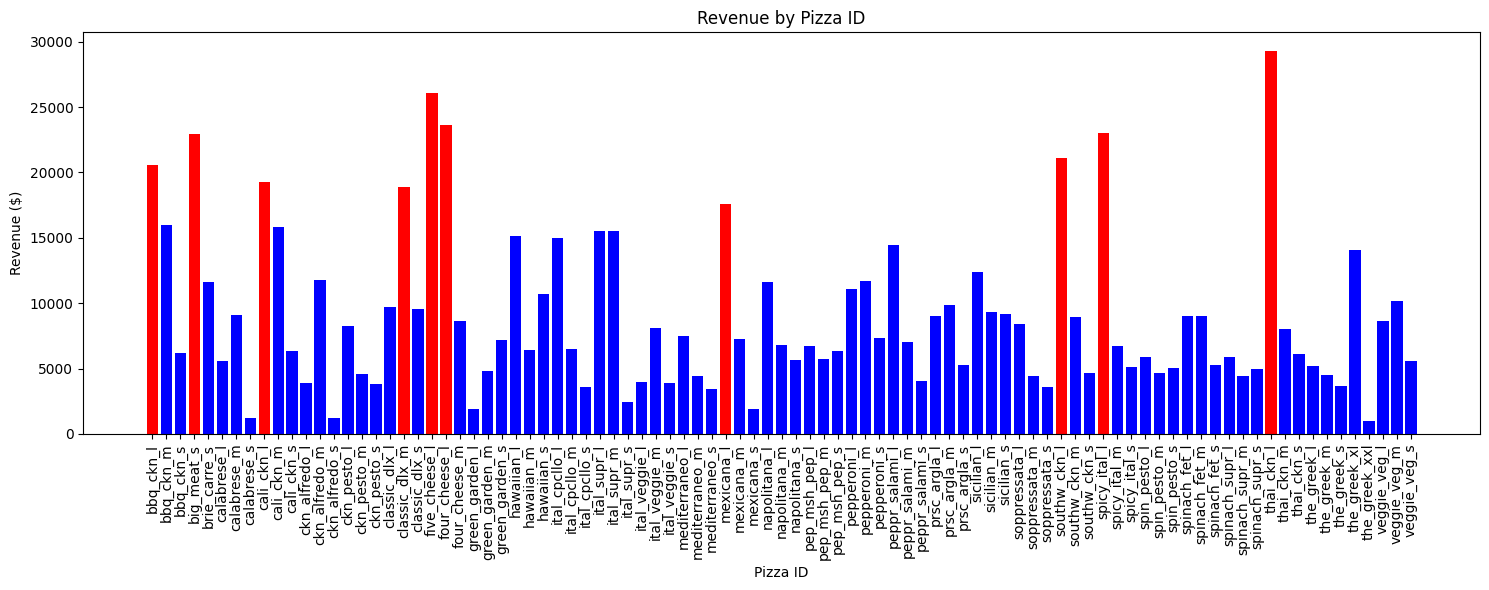

In [ ]:
# Merge the dataframes
merged_df = pd.merge(pizza_orders_detailsdf, pizza_ordersdf, on='order_id')
merged_df = pd.merge(merged_df, pizza_pricesdf, on='pizza_id')
merged_df = pd.merge(merged_df, pizza_typesdf, on='pizza_type_id')

# Calculate the revenue for each pizza
merged_df['revenue'] = merged_df['price'] * merged_df['quantity']

# Group by pizza ID and calculate the total revenue for each pizza
revenue_by_pizza_id = merged_df.groupby('pizza_id')['revenue'].sum()

# Sort the pizzas by revenue in descending order and select the top 10 pizzas
top_10_pizzas = revenue_by_pizza_id.sort_values(ascending=False).head(10)

# Get the unique pizza IDs from the top 10 pizzas
unique_pizza_ids = top_10_pizzas.index

# Create a color map for the top 10 pizzas
colors = ['red' if pizza_id in unique_pizza_ids else 'blue' for pizza_id in revenue_by_pizza_id.index]

# Create a bar chart showing the revenue for each pizza
plt.figure(figsize=(15, 6))
plt.bar(revenue_by_pizza_id.index, revenue_by_pizza_id.values, color=colors)

plt.xlabel('Pizza ID')
plt.ylabel('Revenue ($)')
plt.title('Revenue by Pizza ID')

# Customize the x-axis tick labels to show only the unique pizza IDs
plt.xticks(range(len(revenue_by_pizza_id.index)), revenue_by_pizza_id.index, rotation=90)

plt.tight_layout()
plt.show()


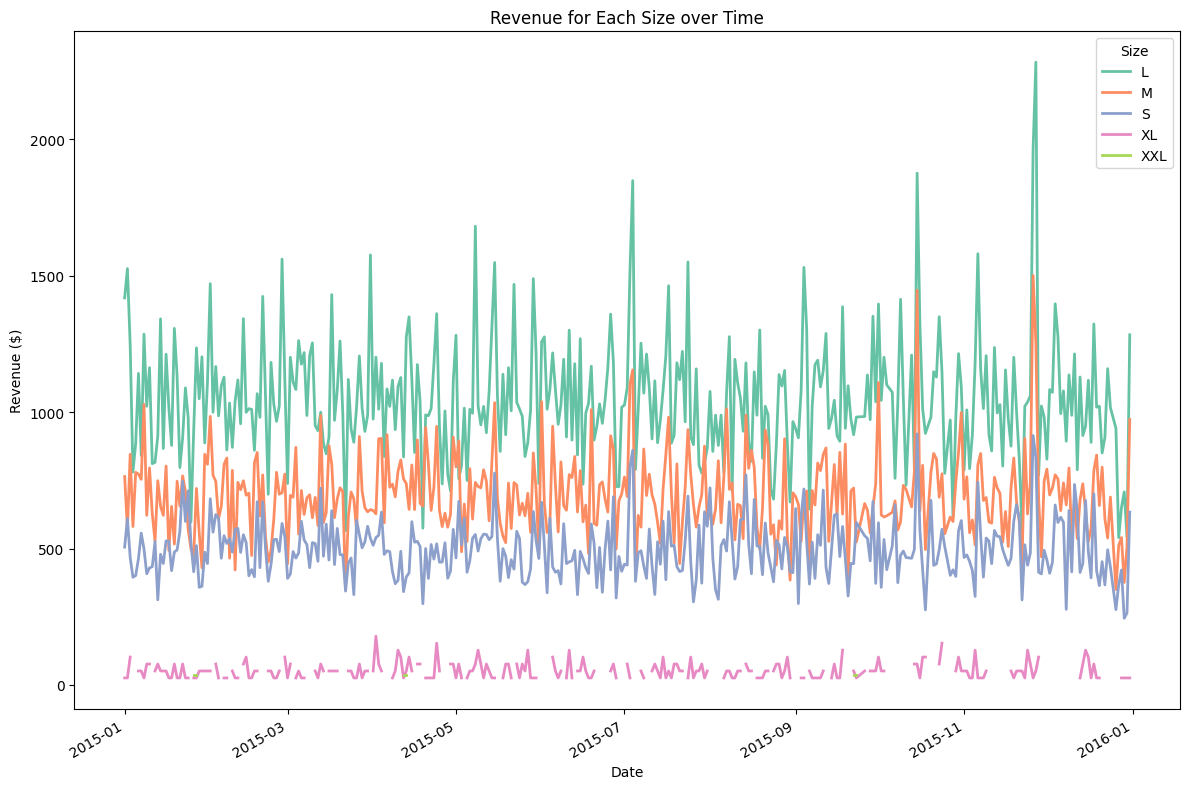

In [ ]:
# Merge the dataframes
merged_df = pd.merge(pizza_orders_detailsdf, pizza_ordersdf, on='order_id')
merged_df = pd.merge(merged_df, pizza_pricesdf, on='pizza_id')
merged_df = pd.merge(merged_df, pizza_typesdf, on='pizza_type_id')

# Convert the "date" column to datetime type
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Calculate the revenue for each pizza
merged_df['revenue'] = merged_df['quantity'] * merged_df['price']

# Group by size and date, and calculate the total revenue for each combination
revenue_by_size_date = merged_df.groupby(['size', 'date'])['revenue'].sum()

# Reset index to make the grouped columns accessible
revenue_by_size_date = revenue_by_size_date.reset_index()

# Pivot the dataframe to have sizes as columns, dates as index, and revenue as values
pivot_df = revenue_by_size_date.pivot(index='date', columns='size', values='revenue')

# Define a seaborn color palette
palette = sns.color_palette("Set2", len(pivot_df.columns))

# Plot the line chart for each size using the seaborn color palette
plt.figure(figsize=(12, 8))

for i, size in enumerate(pivot_df.columns):
    pivot_df[size].plot(kind='line', linewidth=2, color=palette[i])

plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.title('Revenue for Each Size over Time')
plt.legend(title='Size')

plt.tight_layout()
plt.show()

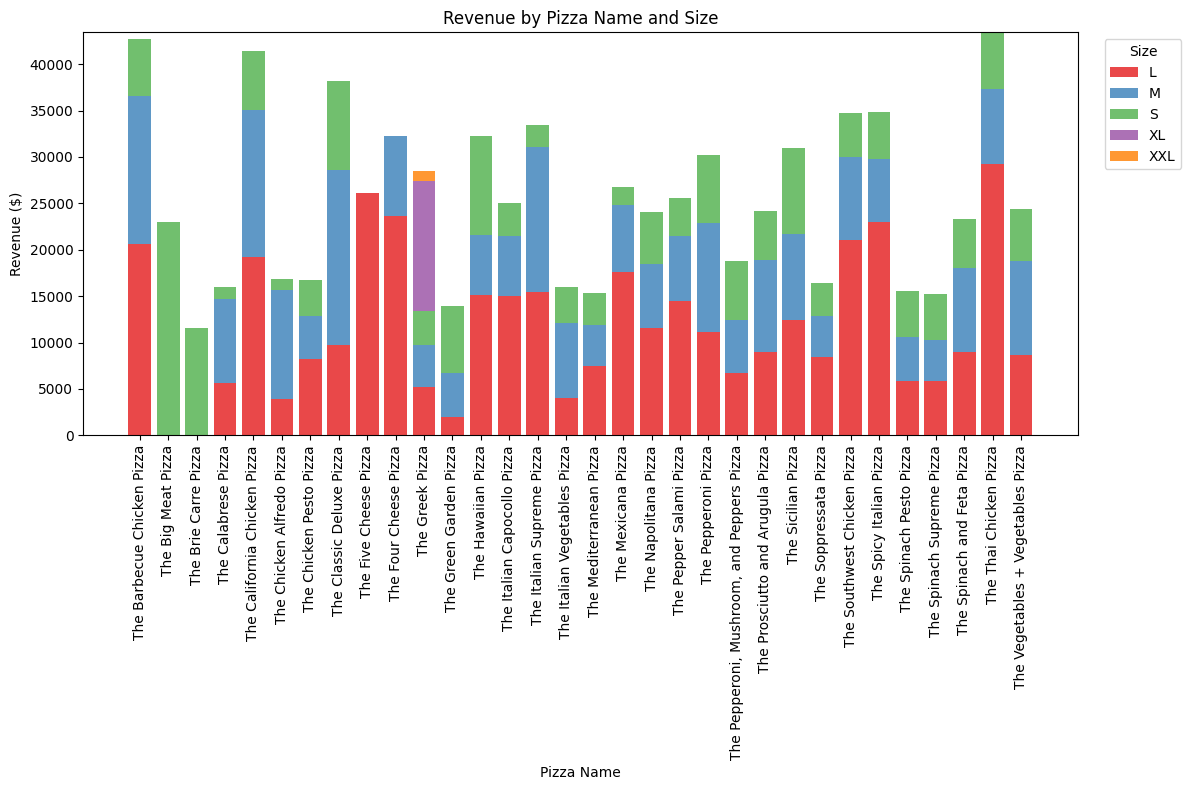

In [ ]:
# Merge the dataframes
merged_df = pd.merge(pizza_orders_detailsdf, pizza_ordersdf, on='order_id')
merged_df = pd.merge(merged_df, pizza_pricesdf, on='pizza_id')
merged_df = pd.merge(merged_df, pizza_typesdf, on='pizza_type_id')

# Calculate the revenue for each pizza
merged_df['revenue'] = merged_df['quantity'] * merged_df['price']

# Group by pizza name, size, and calculate the total revenue for each combination
revenue_by_name_size = merged_df.groupby(['name', 'size'])['revenue'].sum()

# Reset index to make the grouped columns accessible
revenue_by_name_size = revenue_by_name_size.reset_index()

# Pivot the dataframe to have pizza names as index, sizes as columns, and revenue as values
pivot_df = revenue_by_name_size.pivot(index='name', columns='size', values='revenue')

# Plot the stacked bar chart for revenue by pizza name and size
plt.figure(figsize=(12, 8))

# Define a seaborn color palette
palette = sns.color_palette("Set1", len(pivot_df.columns))

# Get the index (pizza names) and convert it to a list
index_list = pivot_df.index.tolist()

# Plot the stacked bars for each pizza name
for i, size in enumerate(pivot_df.columns):
    plt.bar(index_list, pivot_df[size], bottom=pivot_df.iloc[:, :i].sum(axis=1), color=palette[i], alpha=0.8)

plt.xlabel('Pizza Name')
plt.ylabel('Revenue ($)')
plt.title('Revenue by Pizza Name and Size')
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.legend(pivot_df.columns, title='Size', bbox_to_anchor=(1.02, 1), loc='upper left')  # Move the legend outside to the right

plt.tight_layout()
plt.show()


<ipython-input-21-a37af3888a2e>:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust the layout to fit the legend


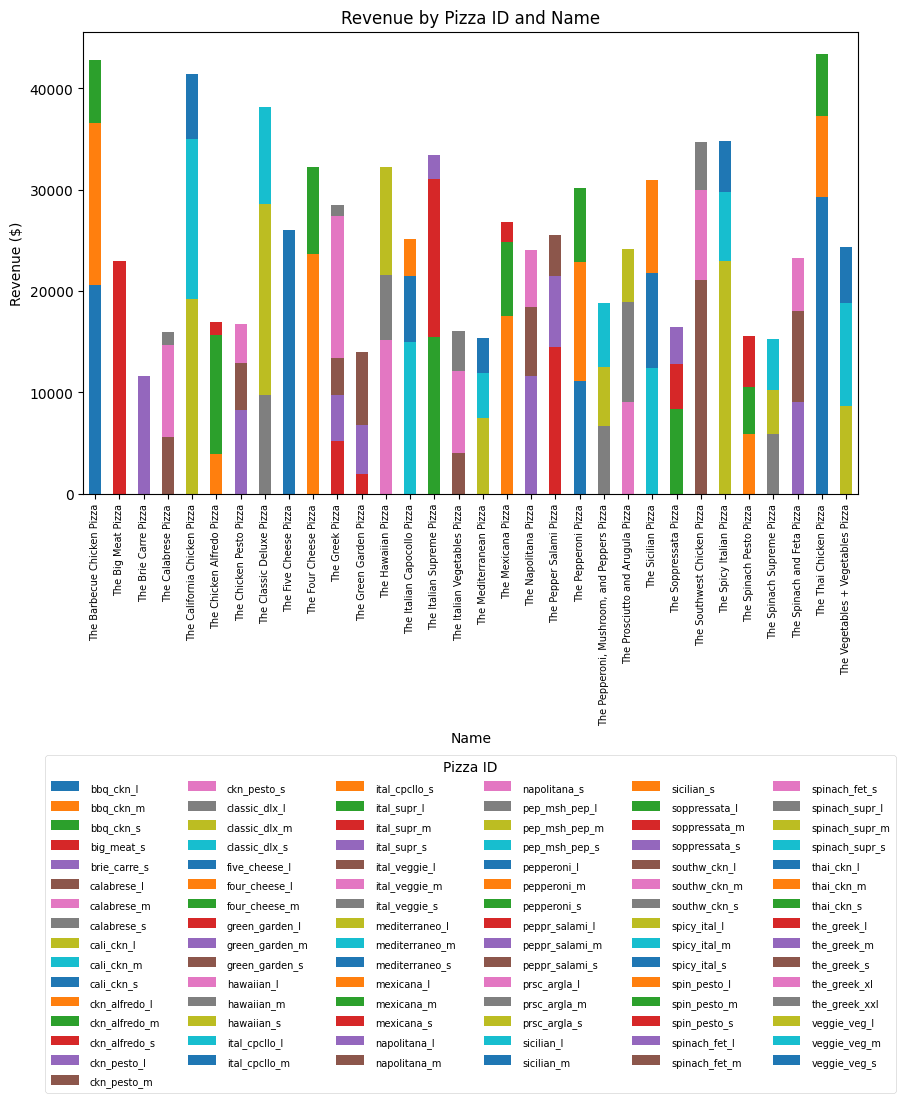

In [ ]:
# Merge the dataframes
merged_df = pd.merge(pizza_orders_detailsdf, pizza_ordersdf, on='order_id')
merged_df = pd.merge(merged_df, pizza_pricesdf, on='pizza_id')
merged_df = pd.merge(merged_df, pizza_typesdf, on='pizza_type_id')

# Calculate the revenue for each pizza
merged_df['revenue'] = merged_df['price'] * merged_df['quantity']

# Group by name and pizza ID, and calculate the total revenue for each combination
revenue_by_name_id = merged_df.groupby(['name', 'pizza_id'])['revenue'].sum()

# Reset index to make the grouped columns accessible
revenue_by_name_id = revenue_by_name_id.reset_index()

# Pivot the dataframe to have pizza IDs as columns and revenues as values
pivot_df = revenue_by_name_id.pivot(index='name', columns='pizza_id', values='revenue')

# Create a stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Name')
plt.ylabel('Revenue ($)')
plt.title('Revenue by Pizza ID and Name')
plt.xticks(rotation=90)
legend = plt.legend(title='Pizza ID', bbox_to_anchor=(0.5, -0.55), loc='upper center', ncol=6)
legend.get_frame().set_linewidth(0.5)  # Set legend frame linewidth
legend.get_title().set_fontsize('10')  # Set legend title fontsize

# Adjust the fontsize of legend labels
for text in legend.get_texts():
    text.set_fontsize(7)

# Decrease the font size of x-axis tick labels
plt.xticks(fontsize=7)

plt.tight_layout()  # Adjust the layout to fit the legend
plt.show()

<ipython-input-22-badcf5341578>:41: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust the layout to fit the legend


<Figure size 2000x3000 with 0 Axes>

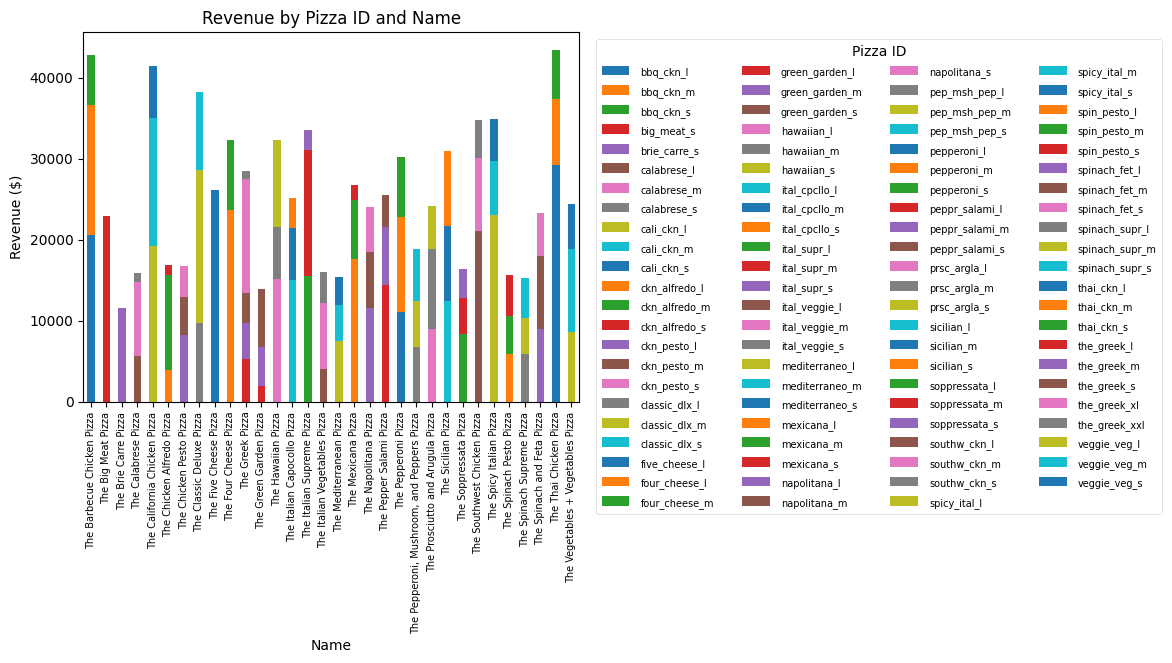

In [ ]:
# Merge the dataframes
merged_df = pd.merge(pizza_orders_detailsdf, pizza_ordersdf, on='order_id')
merged_df = pd.merge(merged_df, pizza_pricesdf, on='pizza_id')
merged_df = pd.merge(merged_df, pizza_typesdf, on='pizza_type_id')

# Calculate the revenue for each pizza
merged_df['revenue'] = merged_df['price'] * merged_df['quantity']

# Group by name and pizza ID, and calculate the total revenue for each combination
revenue_by_name_id = merged_df.groupby(['name', 'pizza_id'])['revenue'].sum()

# Reset index to make the grouped columns accessible
revenue_by_name_id = revenue_by_name_id.reset_index()

# Pivot the dataframe to have pizza IDs as columns and revenues as values
pivot_df = revenue_by_name_id.pivot(index='name', columns='pizza_id', values='revenue')

# Increase the graph size
plt.figure(figsize=(20, 30))

# Create a stacked bar chart
pivot_df.plot(kind='bar', stacked=True)

plt.xlabel('Name')
plt.ylabel('Revenue ($)')
plt.title('Revenue by Pizza ID and Name')
plt.xticks(rotation=90)

# Move the legend to the right and create columns
legend = plt.legend(title='Pizza ID', bbox_to_anchor=(1.02, 1), loc='upper left', ncol=4)
legend.get_frame().set_linewidth(0.5)  # Set legend frame linewidth
legend.get_title().set_fontsize('10')  # Set legend title fontsize

# Adjust the fontsize of legend labels
for text in legend.get_texts():
    text.set_fontsize(7)

# Decrease the font size of x-axis tick labels
plt.xticks(fontsize=7)

plt.tight_layout()  # Adjust the layout to fit the legend
plt.show()


<ipython-input-23-9a8dc7639ce1>:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust the layout to fit the legend


<Figure size 2000x3000 with 0 Axes>

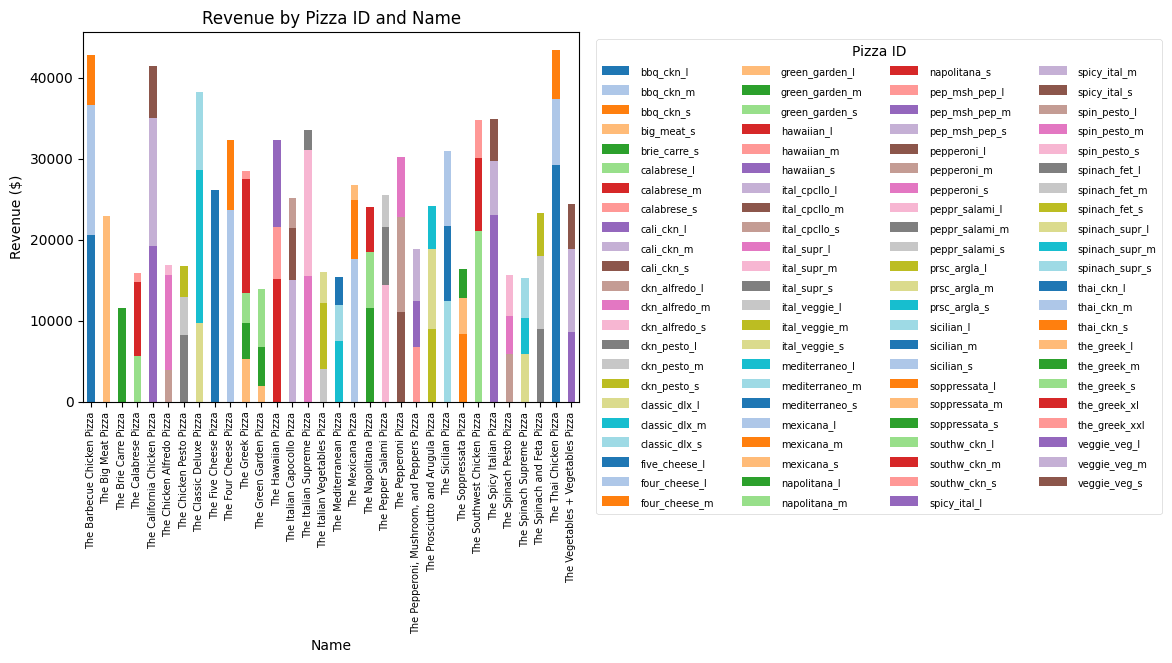

In [ ]:
# Merge the dataframes
merged_df = pd.merge(pizza_orders_detailsdf, pizza_ordersdf, on='order_id')
merged_df = pd.merge(merged_df, pizza_pricesdf, on='pizza_id')
merged_df = pd.merge(merged_df, pizza_typesdf, on='pizza_type_id')

# Calculate the revenue for each pizza
merged_df['revenue'] = merged_df['price'] * merged_df['quantity']

# Group by name and pizza ID, and calculate the total revenue for each combination
revenue_by_name_id = merged_df.groupby(['name', 'pizza_id'])['revenue'].sum()

# Reset index to make the grouped columns accessible
revenue_by_name_id = revenue_by_name_id.reset_index()

# Pivot the dataframe to have pizza IDs as columns and revenues as values
pivot_df = revenue_by_name_id.pivot(index='name', columns='pizza_id', values='revenue')

# Define a unique color palette
color_palette = sns.color_palette('tab20', len(pivot_df.columns))

# Increase the graph size
plt.figure(figsize=(20, 30))

# Create a stacked bar chart with the unique color palette
pivot_df.plot(kind='bar', stacked=True, color=color_palette)

plt.xlabel('Name')
plt.ylabel('Revenue ($)')
plt.title('Revenue by Pizza ID and Name')
plt.xticks(rotation=90)

# Move the legend to the right and create columns
legend = plt.legend(title='Pizza ID', bbox_to_anchor=(1.02, 1), loc='upper left', ncol=4)
legend.get_frame().set_linewidth(0.5)  # Set legend frame linewidth
legend.get_title().set_fontsize('10')  # Set legend title fontsize

# Adjust the fontsize of legend labels
for text in legend.get_texts():
    text.set_fontsize(7)

# Decrease the font size of x-axis tick labels
plt.xticks(fontsize=7)

plt.tight_layout()  # Adjust the layout to fit the legend
plt.show()

In [ ]:
# Merge the dataframes
merged_df = pd.merge(pizza_orders_detailsdf, pizza_pricesdf, on='pizza_id')
merged_df = pd.merge(merged_df, pizza_typesdf, on='pizza_type_id')

# Combine pizza_types category with unique pizza_id
pizza_categories = merged_df.groupby('pizza_id')['name'].first().reset_index()

# Display the combined data
print(pizza_categories)

# Count the occurrences of each pizza name
pizza_counts = pizza_categories['name'].value_counts()

         pizza_id                               name
0       bbq_ckn_l         The Barbecue Chicken Pizza
1       bbq_ckn_m         The Barbecue Chicken Pizza
2       bbq_ckn_s         The Barbecue Chicken Pizza
3      big_meat_s                 The Big Meat Pizza
4    brie_carre_s               The Brie Carre Pizza
..            ...                                ...
86   the_greek_xl                    The Greek Pizza
87  the_greek_xxl                    The Greek Pizza
88   veggie_veg_l  The Vegetables + Vegetables Pizza
89   veggie_veg_m  The Vegetables + Vegetables Pizza
90   veggie_veg_s  The Vegetables + Vegetables Pizza

[91 rows x 2 columns]


In [ ]:
from tabulate import tabulate

# Group the pizza IDs by name
pizza_groups = pizza_categories.groupby('name')['pizza_id'].apply(list).reset_index()

# Display the grouped data
for index, row in pizza_groups.iterrows():
    print("Pizza Name:", row['name'])
    print("Pizza IDs:", row['pizza_id'])
    print()

# Create a list of lists to store the grouped data
table_data = []

# Populate the table data
for index, row in pizza_groups.iterrows():
    table_data.append([row['name'], ', '.join(str(pizza_id) for pizza_id in row['pizza_id'])])

# Define the table headers
headers = ['Pizza Name', 'Pizza IDs']

# Print the table with a compact format
print(tabulate(table_data, headers, tablefmt="plain"))


Pizza Name: The Barbecue Chicken Pizza
Pizza IDs: ['bbq_ckn_l', 'bbq_ckn_m', 'bbq_ckn_s']

Pizza Name: The Big Meat Pizza
Pizza IDs: ['big_meat_s']

Pizza Name: The Brie Carre Pizza
Pizza IDs: ['brie_carre_s']

Pizza Name: The Calabrese Pizza
Pizza IDs: ['calabrese_l', 'calabrese_m', 'calabrese_s']

Pizza Name: The California Chicken Pizza
Pizza IDs: ['cali_ckn_l', 'cali_ckn_m', 'cali_ckn_s']

Pizza Name: The Chicken Alfredo Pizza
Pizza IDs: ['ckn_alfredo_l', 'ckn_alfredo_m', 'ckn_alfredo_s']

Pizza Name: The Chicken Pesto Pizza
Pizza IDs: ['ckn_pesto_l', 'ckn_pesto_m', 'ckn_pesto_s']

Pizza Name: The Classic Deluxe Pizza
Pizza IDs: ['classic_dlx_l', 'classic_dlx_m', 'classic_dlx_s']

Pizza Name: The Five Cheese Pizza
Pizza IDs: ['five_cheese_l']

Pizza Name: The Four Cheese Pizza
Pizza IDs: ['four_cheese_l', 'four_cheese_m']

Pizza Name: The Greek Pizza
Pizza IDs: ['the_greek_l', 'the_greek_m', 'the_greek_s', 'the_greek_xl', 'the_greek_xxl']

Pizza Name: The Green Garden Pizza
Pizza I

In [ ]:
# Merge the dataframes
merged_df = pd.merge(pizza_orders_detailsdf, pizza_ordersdf, on='order_id')
merged_df = pd.merge(merged_df, pizza_pricesdf, on='pizza_id')
merged_df = pd.merge(merged_df, pizza_typesdf, on='pizza_type_id')

# Group by pizza name and collect unique ingredients
grouped_data = merged_df.groupby('name')['ingredients'].unique()

# Iterate over the grouped data and print out the pizza name and ingredients
for name, ingredients in grouped_data.items():
    print(f"Pizza Name: {name}")
    print("Ingredients:")
    for ingredient in ingredients:
        print(ingredient)
    print()

# Calculate the count of unique ingredients for each pizza name
ingredient_counts = merged_df.groupby('name')['ingredients'].apply(lambda x: len(set(','.join(x).split(','))))

# Print out the pizza name and ingredient count
for name, count in ingredient_counts.items():
    print(f"Pizza Name: {name}")
    print(f"Ingredient Count: {count}")
    print()

Pizza Name: The Barbecue Chicken Pizza
Ingredients:
Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce

Pizza Name: The Big Meat Pizza
Ingredients:
Bacon, Pepperoni, Italian Sausage, Chorizo Sausage

Pizza Name: The Brie Carre Pizza
Ingredients:
Brie Carre Cheese, Prosciutto, Caramelized Onions, Pears, Thyme, Garlic

Pizza Name: The Calabrese Pizza
Ingredients:
�Nduja Salami, Pancetta, Tomatoes, Red Onions, Friggitello Peppers, Garlic

Pizza Name: The California Chicken Pizza
Ingredients:
Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese

Pizza Name: The Chicken Alfredo Pizza
Ingredients:
Chicken, Red Onions, Red Peppers, Mushrooms, Asiago Cheese, Alfredo Sauce

Pizza Name: The Chicken Pesto Pizza
Ingredients:
Chicken, Tomatoes, Red Peppers, Spinach, Garlic, Pesto Sauce

Pizza Name: The Classic Deluxe Pizza
Ingredients:
Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon

Pizza Name: The Five Cheese Pizza
Ingredients:


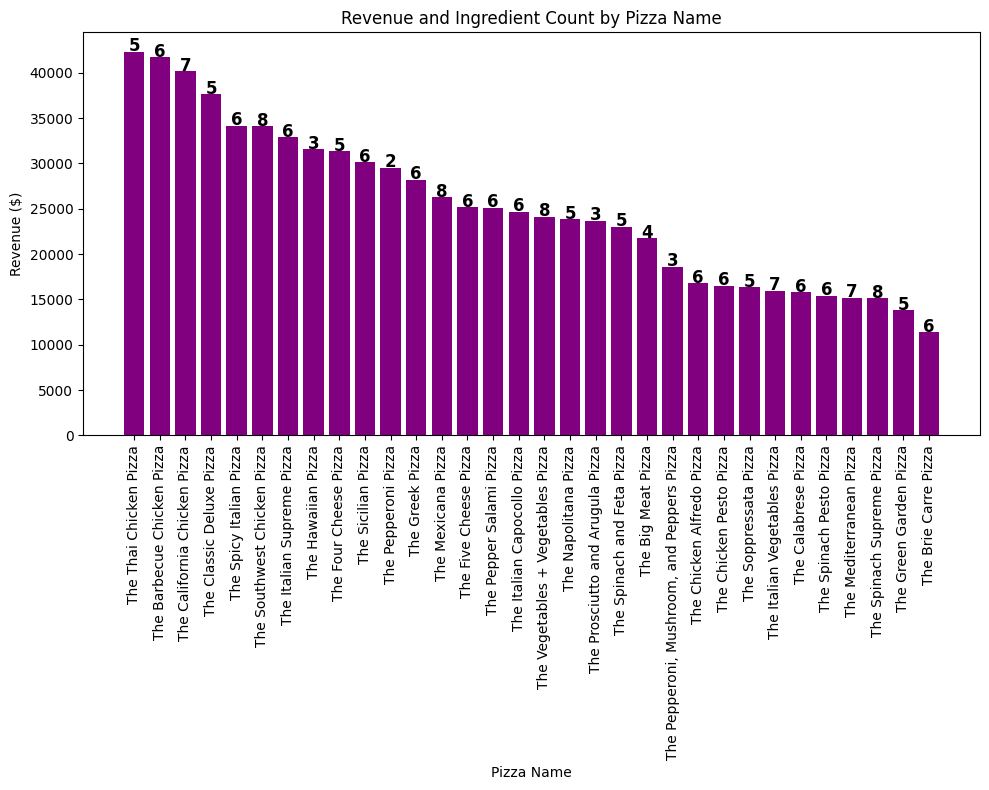

In [ ]:
# Merge the dataframes
merged_df = pd.merge(pizza_orders_detailsdf, pizza_ordersdf, on='order_id')
merged_df = pd.merge(merged_df, pizza_pricesdf, on='pizza_id')
merged_df = pd.merge(merged_df, pizza_typesdf, on='pizza_type_id')

# Calculate the count of unique ingredients for each pizza name
ingredient_counts = merged_df.groupby('name')['ingredients'].apply(lambda x: len(set(','.join(x).split(','))))

# Sort the pizza names by revenue in descending order
revenue_by_name = merged_df.groupby('name')['price'].sum().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 8))

# Plot the revenue with customized color
plt.bar(revenue_by_name.index, revenue_by_name, color='purple')

# Add the ingredient count on top of each bar with increased font size
for i, count in enumerate(ingredient_counts.reindex(revenue_by_name.index)):
    plt.text(i, revenue_by_name[i] + 50, f'{count}', ha='center', fontsize=12, fontweight='bold')

plt.xlabel('Pizza Name')
plt.ylabel('Revenue ($)')
plt.title('Revenue and Ingredient Count by Pizza Name')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<ipython-input-28-9855ec52cfcb>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('Set3', len(unique_counts))
<ipython-input-28-9855ec52cfcb>:16: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (name, revenue) in enumerate(revenue_by_name.iteritems()):
<ipython-input-28-9855ec52cfcb>:22: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (name, revenue) in enumerate(revenue_by_name.iteritems()):


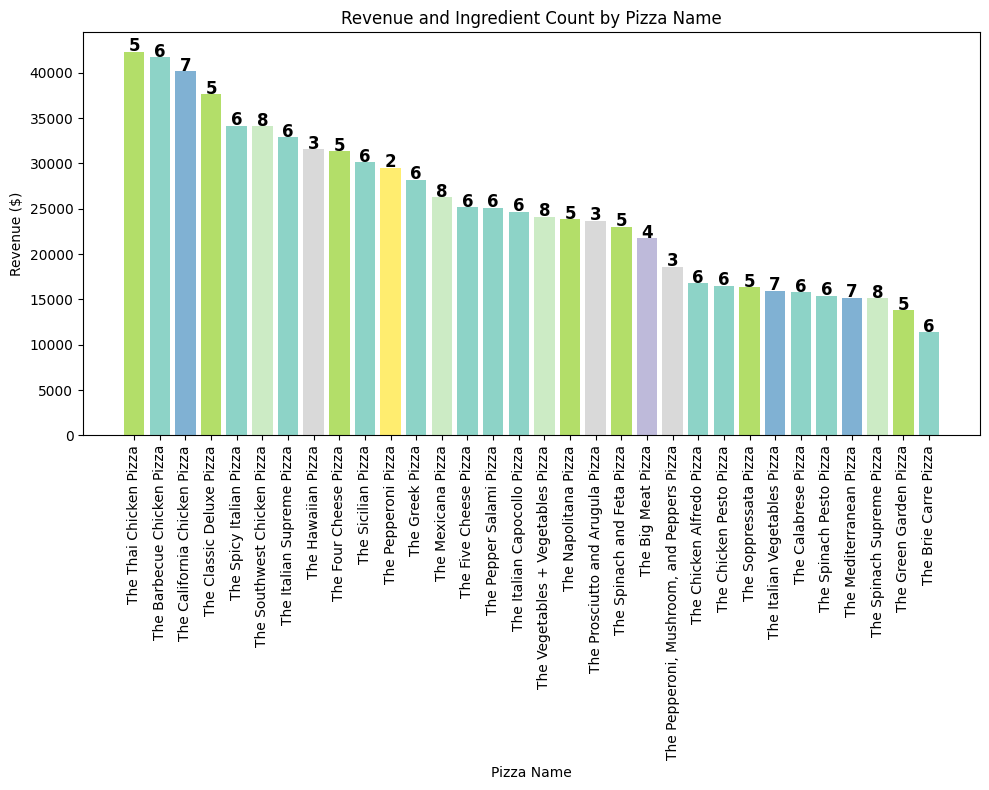

In [ ]:
# Calculate the count of unique ingredients for each pizza name
ingredient_counts = merged_df.groupby('name')['ingredients'].apply(lambda x: len(set(','.join(x).split(','))))

# Sort the pizza names by revenue in descending order
revenue_by_name = merged_df.groupby('name')['price'].sum().sort_values(ascending=False)

# Get unique ingredient counts and assign a unique color to each count
unique_counts = ingredient_counts.unique()
color_map = plt.cm.get_cmap('Set3', len(unique_counts))
count_colors = {count: color_map(i) for i, count in enumerate(unique_counts)}

# Create a bar chart
plt.figure(figsize=(10, 8))

# Plot the revenue with different colors based on ingredient count
for i, (name, revenue) in enumerate(revenue_by_name.iteritems()):
    count = ingredient_counts[name]
    color = count_colors[count]
    plt.bar(name, revenue, color=color)

# Add the ingredient count on top of each bar with increased font size
for i, (name, revenue) in enumerate(revenue_by_name.iteritems()):
    count = ingredient_counts[name]
    plt.text(i, revenue + 50, f'{count}', ha='center', fontsize=12, fontweight='bold')

plt.xlabel('Pizza Name')
plt.ylabel('Revenue ($)')
plt.title('Revenue and Ingredient Count by Pizza Name')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-29-6a86fe9292ba>:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (name, ratio_value) in enumerate(sorted_ratio.iteritems()):
<ipython-input-29-6a86fe9292ba>:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (name, ratio_value) in enumerate(sorted_ratio.iteritems()):


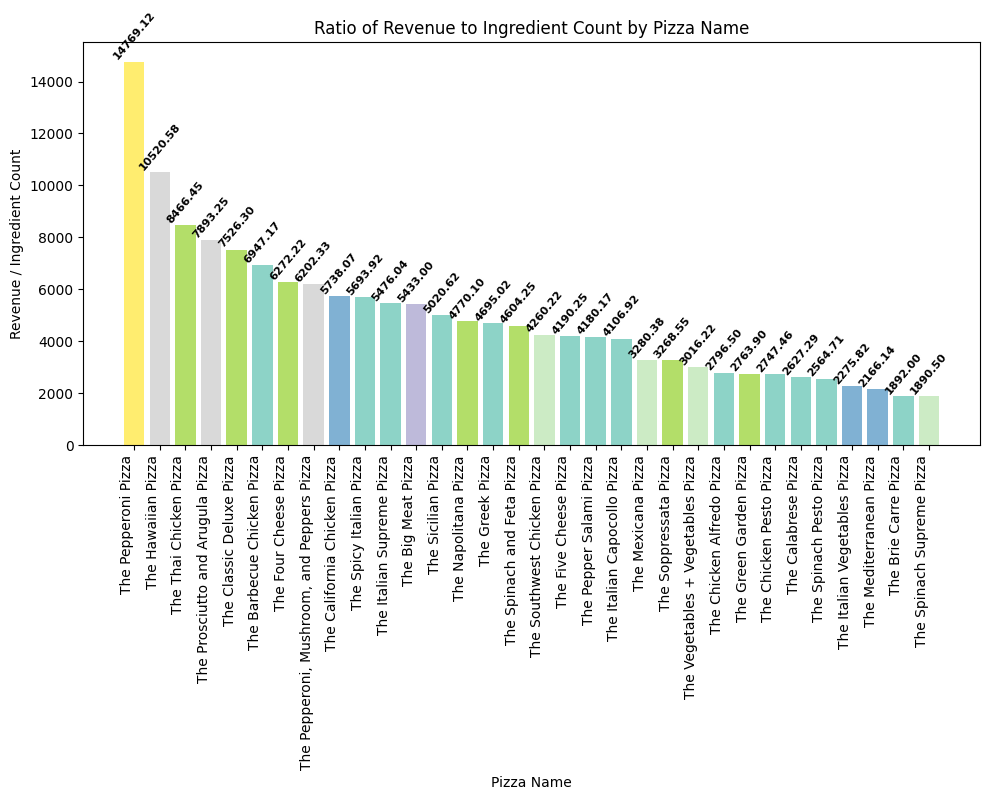

In [ ]:
ratio = revenue_by_name / ingredient_counts
sorted_ratio = ratio.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 8))

# Plot the ratio with different colors based on ingredient count
for i, (name, ratio_value) in enumerate(sorted_ratio.iteritems()):
    count = ingredient_counts[name]
    color = count_colors[count]
    plt.bar(name, ratio_value, color=color)

# Add the ratio on top of each bar with decreased font size and adjusted position
for i, (name, ratio_value) in enumerate(sorted_ratio.iteritems()):
    count = ingredient_counts[name]
    plt.text(i, ratio_value + 0.01, f'{ratio_value:.2f}', ha='center', fontsize=8, fontweight='bold', va='bottom', rotation = 50)

plt.xlabel('Pizza Name')
plt.ylabel('Revenue / Ingredient Count')
plt.title('Ratio of Revenue to Ingredient Count by Pizza Name')
plt.xticks(rotation=90, ha='right')  # Rotate and align the labels
plt.tight_layout()
plt.show()


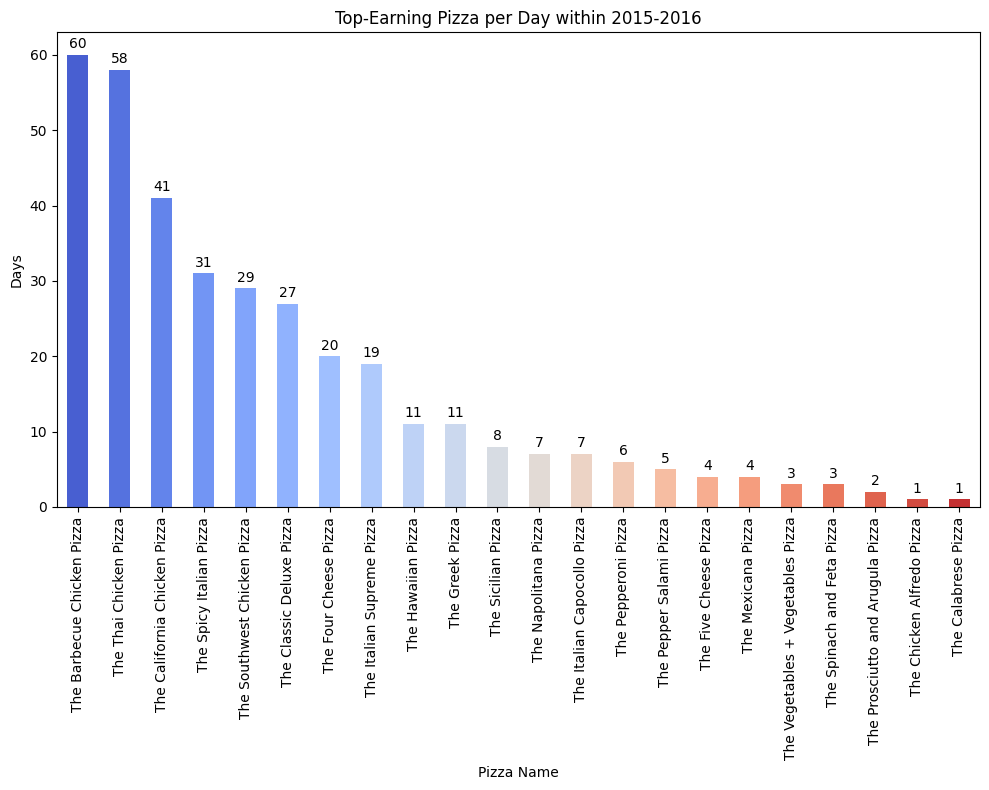

In [ ]:
# Merge the dataframes and perform necessary calculations
# Merge the dataframes
merged_df = pd.merge(pizza_orders_detailsdf, pizza_ordersdf, on='order_id')
merged_df = pd.merge(merged_df, pizza_pricesdf, on='pizza_id')
merged_df = pd.merge(merged_df, pizza_typesdf, on='pizza_type_id')

# Convert the "date" column to datetime type
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Calculate the revenue for each pizza
merged_df['revenue'] = merged_df['quantity'] * merged_df['price']

# Group by day and pizza name, and calculate the total revenue for each combination
revenue_by_day_pizza = merged_df.groupby([pd.Grouper(key='date', freq='D'), 'name'])['revenue'].sum()

# Find the pizza that earned the most revenue for each day
top_earning_pizza_per_day = revenue_by_day_pizza.groupby(level=0).idxmax().apply(lambda x: x[1])

# Calculate the count of how often each pizza earns the most revenue per day
pizza_count = top_earning_pizza_per_day.value_counts()

# Create a bar plot to visualize the count of how often each pizza earns the most revenue per day throughout the year
plt.figure(figsize=(10, 8))

# Define a custom color palette with unique colors for each pizza
color_palette = sns.color_palette('coolwarm', len(pizza_count))

# Plot the count of top-earning pizzas with the custom color palette
pizza_count.plot(kind='bar', color=color_palette)

# Set plot title and labels
plt.title('Top-Earning Pizza per Day within 2015-2016')
plt.xlabel('Pizza Name')
plt.ylabel('Days')

# Add count labels on top of each bar
for i, count in enumerate(pizza_count):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

# Improve plot aesthetics
plt.tight_layout()

plt.show()


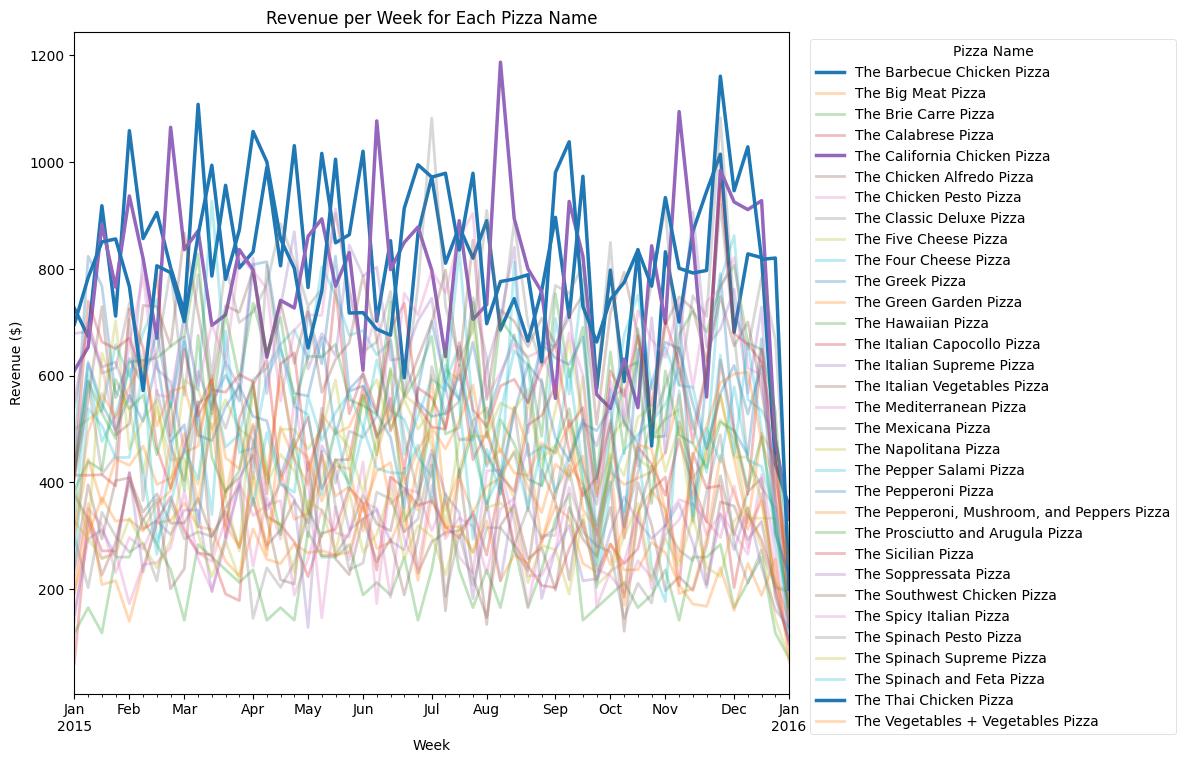

In [ ]:
# Merge the dataframes
merged_df = pd.merge(pizza_orders_detailsdf, pizza_ordersdf, on='order_id')
merged_df = pd.merge(merged_df, pizza_pricesdf, on='pizza_id')
merged_df = pd.merge(merged_df, pizza_typesdf, on='pizza_type_id')

# Convert the "date" column to datetime type
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Calculate the revenue for each pizza
merged_df['revenue'] = merged_df['quantity'] * merged_df['price']

# Group by pizza name and week, and calculate the total revenue for each combination
revenue_by_name_week = merged_df.groupby(['name', pd.Grouper(key='date', freq='W-MON')])['revenue'].sum()

# Reset index to make the grouped columns accessible
revenue_by_name_week = revenue_by_name_week.reset_index()

# Pivot the dataframe to have pizza names as columns and revenue per week as values
pivot_df = revenue_by_name_week.pivot(index='date', columns='name', values='revenue')

# Calculate the average revenue per week for each pizza name
average_revenue = pivot_df.mean()

# Get the top 10 pizza names with the highest average revenue
top_3_names = average_revenue.nlargest(3).index

# Create a line plot to visualize the revenue per week for each pizza name
plt.figure(figsize=(12, 8))  # Set a bigger figure size

for name in pivot_df.columns:
    if name in top_3_names:
        # Bold the lines for the top 10 names
        pivot_df[name].plot(kind='line', linewidth=2.5, alpha=1)
    else:
        # Set lower transparency for other lines
        pivot_df[name].plot(kind='line', linewidth=2, alpha=0.3)

plt.xlabel('Week')
plt.ylabel('Revenue ($)')
plt.title('Revenue per Week for Each Pizza Name')

legend = plt.legend(title='Pizza Name', bbox_to_anchor=(1.02, 1), loc='upper left')  # Adjust legend position
legend.get_frame().set_linewidth(0.5)  # Set legend frame linewidth
legend.get_title().set_fontsize(10)  # Set legend title fontsize

plt.tight_layout()
plt.show()

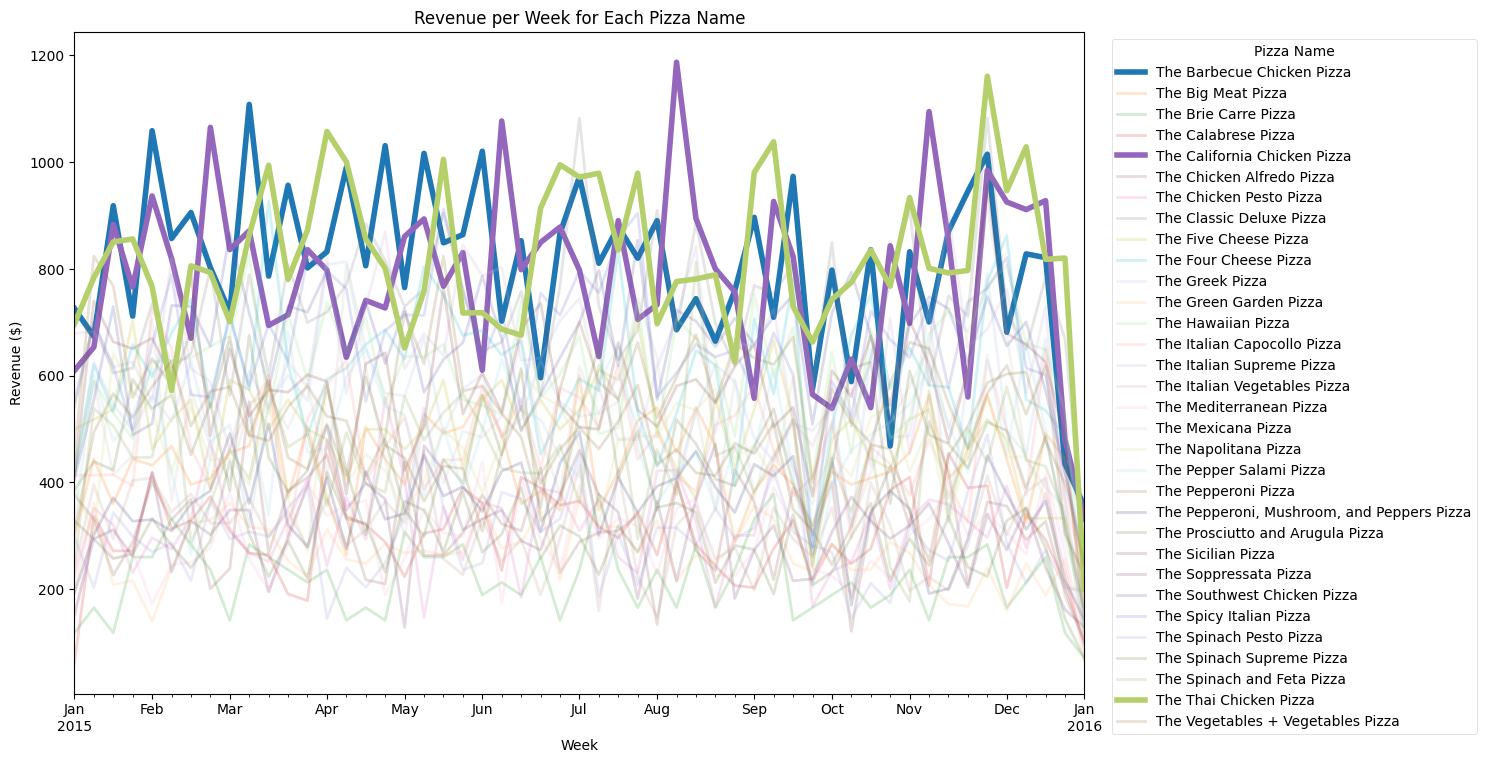

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a custom colormap with darker and more distinct colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf', '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94',
          '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5', '#8c6d31', '#393b79', '#637939', '#843c39',
          '#7b4173', '#5254a3', '#6b6ecf', '#9c9ede', '#637939', '#8ca252', '#b5cf6b', '#8c6d31',
          '#bd9e39', '#e7ba52', '#843c39', '#ad494a', '#d6616b', '#e7969c', '#7b4173', '#ce6dbd']

cmap = ListedColormap(colors)

plt.figure(figsize=(15, 8))  # Set a bigger figure size

for i, name in enumerate(pivot_df.columns):
    if name in top_3_names:
        # Bold the lines for the top 10 names
        pivot_df[name].plot(kind='line', linewidth=4, alpha=1, color=cmap(i))
    else:
        # Set lower transparency for other lines
        pivot_df[name].plot(kind='line', linewidth=2, alpha=0.2, color=cmap(i))

plt.xlabel('Week')
plt.ylabel('Revenue ($)')
plt.title('Revenue per Week for Each Pizza Name')

# Create custom legend labels using pizza names
legend_labels = pivot_df.columns.tolist()
legend = plt.legend(legend_labels, title='Pizza Name', bbox_to_anchor=(1.02, 1), loc='upper left')  # Adjust legend position
legend.get_frame().set_linewidth(0.5)  # Set legend frame linewidth
legend.get_title().set_fontsize(10)  # Set legend title fontsize

plt.tight_layout()
plt.show()

plt.show()